In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
heart = pd.read_csv('Heart.csv')

heart['AHD'] = 1*(heart['AHD']=="Yes")

print(heart.shape)

(303, 15)


In [4]:
heart_train, heart_val = train_test_split(heart, train_size=0.75, random_state=109)
print(heart_train.shape, heart_val.shape)

(227, 15) (76, 15)


In [5]:
x_train = heart_train[['Age']]
y_train = heart_train['AHD']

knn20 = KNeighborsClassifier(n_neighbors=20)

knn20.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=20)

In [6]:
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)[:,1]


print(yhat20_class[1:10])
print(yhat20_prob[1:10])


[0 1 1 1 0 1 1 0 1]
[0.25 0.6  0.75 0.7  0.35 0.55 0.65 0.3  0.65]


In [7]:
logit1 = LogisticRegression(penalty=None, max_iter=1000)
logit1.fit(x_train,y_train)

print("Logistic Regression Estimated Betas(80,01)",logit1.intercept_, logit1.coef_ )



Logistic Regression Estimated Betas(80,01) [-3.32616703] [[0.05933142]]


In [8]:
logit1.predict_proba([[60]])

array([[0.44183498, 0.55816502]])

In [9]:
x_val = heart_val[['Age']]
y_val = heart_val['AHD']

knn20_train_accuracy= knn20.score(x_train, y_train)
knn20_val_accuracy = knn20.score(x_val,y_val)

logit_train_accuracy=logit1.score(x_train,y_train)
logit_val_accuracy= logit1.score(x_val, y_val)

print("Knn Train & Validation accuracy",knn20_train_accuracy, knn20_val_accuracy )
print("Logistic Train & Validation Accuracy:",logit_train_accuracy,logit_val_accuracy )

Knn Train & Validation accuracy 0.6563876651982379 0.5921052631578947
Logistic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


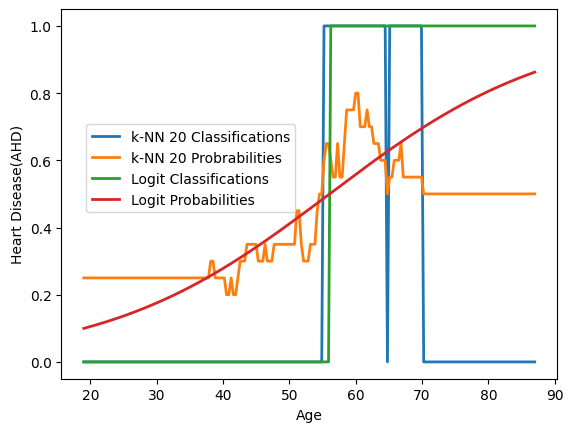

In [11]:
x = np.linspace(np.min(heart[['Age']]) - 10, np.max(heart['Age'])+ 10,200).reshape(-1, 1)

yhat_class_knn20 = knn20.predict(x)
yhat_prob_knn20=knn20.predict_proba(x)[:,1]

yhat_class_logit = logit1.predict(x)
yhat_prob_logit = logit1.predict_proba(x)[:,1]

plt.plot(x, yhat_class_knn20, label="k-NN 20 Classifications", linewidth=2)
plt.plot(x, yhat_prob_knn20, label="k-NN 20 Probrabilities",linewidth=2)
plt.plot(x, yhat_class_logit, label="Logit Classifications", linewidth=2)
plt.plot(x,yhat_prob_logit, label="Logit Probabilities",linewidth=2)

plt.legend(loc=(0.05, 0.45))
plt.xlabel("Age")
plt.ylabel("Heart Disease(AHD)")

plt.show()
